In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202108          7  13464     9633   17295      20          14   
1     202107          7  13633    10325   16941      21          16   
2     202106          7  13383     9793   16973      20          15   
3     202105          7  12210     8988   15432      18          13   
4     202104          7  12026     8826   15226      18          13   
5     202103          7   8913     6375   11451      13           9   
6     202102          7   7795     5430   10160      12           8   
7     202101          7  10525     7750   13300      16          12   
8     202053          7  11978     8406   15550      18          13   
9     202052          7  12012     8285   15739      18          12   
10    202051          7  10564     7574   13554      16          11   
11    202050          7   7063     4744    9382      11           7   
12    202049          7   5026     3145    6907       8           5   
13    202048          7   6683     4312    9054      10           6   
14    202047          7   4999     2963    7035       8           5   
15    202046          7   3752     1963    5541       6           3   
16    202045          7   3696     2016    5376       6           3   
17    202044          7   4391     2375    6407       7           4   
18    202043          7   4376     2505    6247       7           4   
19    202042          7   4000     1979    6021       6           3   
20    202041          7   3961     2099    5823       6           3   
21    202040          7   2078      675    3481       3           1   
22    202039          7   1049      237    1861       2           1   
23    202038          7   2253      782    3724       3           1   
24    202037          7   1584      405    2763       2           0   
25    202036          7    919      100    1738       1           0   
26    202035          7    828        0    1694       1           0   
27    202034          7   2272      371    4173       3           0   
28    202033          7   1284      177    2391       2           0   
29    202032          7   2650      689    4611       4           1   
...      ...        ...    ...      ...     ...     ...         ...   
1548  199126          7  17608    11304   23912      31          20   
1549  199125          7  16169    10700   21638      28          18   
1550  199124          7  16171    10071   22271      28          17   
1551  199123          7  11947     7671   16223      21          13   
1552  199122          7  15452     9953   20951      27          17   
1553  199121          7  14903     8975   20831      26          16   
1554  199120          7  19053    12742   25364      34          23   
1555  199119          7  16739    11246   22232      29          19   
1556  199118          7  21385    13882   28888      38          25   
1557  199117          7  13462     8877   18047      24          16   
1558  199116          7  14857    10068   19646      26          18   
1559  199115          7  13975     9781   18169      25          18   
1560  199114          7  12265     7684   16846      22          14   
1561  199113          7   9567     6041   13093      17          11   
1562  199112          7  10864     7331   14397      19          13   
1563  199111          7  15574    11184   19964      27          19   
1564  199110          7  16643    11372   21914      29          20   
1565  199109          7  13741     8780   18702      24          15   
1566  199108          7  13289     8813   17765      23          15   
1567  199107          7  12337     8077   16597      22          15   
1568  199106          7  10877     7013   14741      19          12   
1569  199105          7  10442     6544   14340      18          11   
1570  199104          7   7913     4563   11263      14           8   
1571  199103          7  15387    10484   20290      27          18   
1572  199102          7  16277  

Y a t-il des points manquants dans ces données ?

In [12]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

La réponse est non, nous pouvons poursuivre

Les données utilisent toujours une convention inhabituelle, à savoir que le numéro de la semaine est collé à celui de l'année

Pour aider Pandas il va falloir utiliser la bibliothèque Isoweek

La première étape est de convertir les dates (l'entier) en chaine de caractère. Je cherche la solution

In [15]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202107          7  15273    11019   19527      23          17   
1     202106          7  13642     9914   17370      21          15   
2     202105          7  12210     8988   15432      18          13   
3     202104          7  12026     8826   15226      18          13   
4     202103          7   8913     6375   11451      13           9   
5     202102          7   7795     5430   10160      12           8   
6     202101          7  10525     7750   13300      16          12   
7     202053          7  11978     8406   15550      18          13   
8     202052          7  12012     8285   15739      18          12   
9     202051          7  10564     7574   13554      16          11   
10    202050          7   7063     4744    9382      11           7   
11    202049          7   5026     3145    6907       8           5   
12    202048          7   6683     4312    9054      10           6   
13    202047          7   4999     2963    7035       8           5   
14    202046          7   3752     1963    5541       6           3   
15    202045          7   3696     2016    5376       6           3   
16    202044          7   4391     2375    6407       7           4   
17    202043          7   4376     2505    6247       7           4   
18    202042          7   4000     1979    6021       6           3   
19    202041          7   3961     2099    5823       6           3   
20    202040          7   2078      675    3481       3           1   
21    202039          7   1049      237    1861       2           1   
22    202038          7   2253      782    3724       3           1   
23    202037          7   1584      405    2763       2           0   
24    202036          7    919      100    1738       1           0   
25    202035          7    828        0    1694       1           0   
26    202034          7   2272      371    4173       3           0   
27    202033          7   1284      177    2391       2           0   
28    202032          7   2650      689    4611       4           1   
29    202031          7   1303      100    2506       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1547  199126          7  17608    11304   23912      31          20   
1548  199125          7  16169    10700   21638      28          18   
1549  199124          7  16171    10071   22271      28          17   
1550  199123          7  11947     7671   16223      21          13   
1551  199122          7  15452     9953   20951      27          17   
1552  199121          7  14903     8975   20831      26          16   
1553  199120          7  19053    12742   25364      34          23   
1554  199119          7  16739    11246   22232      29          19   
1555  199118          7  21385    13882   28888      38          25   
1556  199117          7  13462     8877   18047      24          16   
1557  199116          7  14857    10068   19646      26          18   
1558  199115          7  13975     9781   18169      25          18   
1559  199114          7  12265     7684   16846      22          14   
1560  199113          7   9567     6041   13093      17          11   
1561  199112          7  10864     7331   14397      19          13   
1562  199111          7  15574    11184   19964      27          19   
1563  199110          7  16643    11372   21914      29          20   
1564  199109          7  13741     8780   18702      24          15   
1565  199108          7  13289     8813   17765      23          15   
1566  199107          7  12337     8077   16597      22          15   
1567  199106          7  10877     7013   14741      19          12   
1568  199105          7  10442     6544   14340      18          11   
1569  199104          7   7913     4563   11263      14           8   
1570  199103          7  15387    10484   20290      27          18   
1571  199102          7  16277  

In [39]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

In [40]:
data['period'] = [convert_week(yw) for yw in data['week']]

NameError: name 'data' is not defined

In [41]:
sorted_data = data.set_index('period').sort_index()

NameError: name 'data' is not defined

In [42]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

NameError: name 'data' is not defined

In [43]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202108          7  13464     9633   17295      20          14   
1     202107          7  13633    10325   16941      21          16   
2     202106          7  13383     9793   16973      20          15   
3     202105          7  12210     8988   15432      18          13   
4     202104          7  12026     8826   15226      18          13   
5     202103          7   8913     6375   11451      13           9   
6     202102          7   7795     5430   10160      12           8   
7     202101          7  10525     7750   13300      16          12   
8     202053          7  11978     8406   15550      18          13   
9     202052          7  12012     8285   15739      18          12   
10    202051          7  10564     7574   13554      16          11   
11    202050          7   7063     4744    9382      11           7   
12    202049          7   5026     3145    6907       8           5   
13    202048          7   6683     4312    9054      10           6   
14    202047          7   4999     2963    7035       8           5   
15    202046          7   3752     1963    5541       6           3   
16    202045          7   3696     2016    5376       6           3   
17    202044          7   4391     2375    6407       7           4   
18    202043          7   4376     2505    6247       7           4   
19    202042          7   4000     1979    6021       6           3   
20    202041          7   3961     2099    5823       6           3   
21    202040          7   2078      675    3481       3           1   
22    202039          7   1049      237    1861       2           1   
23    202038          7   2253      782    3724       3           1   
24    202037          7   1584      405    2763       2           0   
25    202036          7    919      100    1738       1           0   
26    202035          7    828        0    1694       1           0   
27    202034          7   2272      371    4173       3           0   
28    202033          7   1284      177    2391       2           0   
29    202032          7   2650      689    4611       4           1   
...      ...        ...    ...      ...     ...     ...         ...   
1548  199126          7  17608    11304   23912      31          20   
1549  199125          7  16169    10700   21638      28          18   
1550  199124          7  16171    10071   22271      28          17   
1551  199123          7  11947     7671   16223      21          13   
1552  199122          7  15452     9953   20951      27          17   
1553  199121          7  14903     8975   20831      26          16   
1554  199120          7  19053    12742   25364      34          23   
1555  199119          7  16739    11246   22232      29          19   
1556  199118          7  21385    13882   28888      38          25   
1557  199117          7  13462     8877   18047      24          16   
1558  199116          7  14857    10068   19646      26          18   
1559  199115          7  13975     9781   18169      25          18   
1560  199114          7  12265     7684   16846      22          14   
1561  199113          7   9567     6041   13093      17          11   
1562  199112          7  10864     7331   14397      19          13   
1563  199111          7  15574    11184   19964      27          19   
1564  199110          7  16643    11372   21914      29          20   
1565  199109          7  13741     8780   18702      24          15   
1566  199108          7  13289     8813   17765      23          15   
1567  199107          7  12337     8077   16597      22          15   
1568  199106          7  10877     7013   14741      19          12   
1569  199105          7  10442     6544   14340      18          11   
1570  199104          7   7913     4563   11263      14           8   
1571  199103          7  15387    10484   20290      27          18   
1572  199102          7  16277  

In [44]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [45]:
sorted_data = data.set_index('period').sort_index()

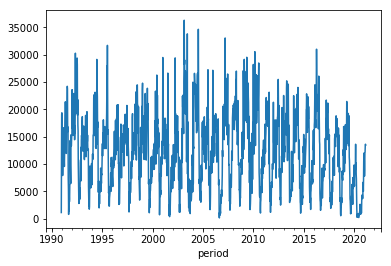

In [46]:
sorted_data['inc'].plot()

In [49]:
first_september_week = [pd.Period(pd.Timestamp(y, 7, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

In [50]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

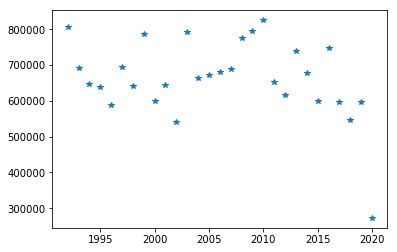

In [51]:
yearly_incidence.plot(style='*')

In [52]:
yearly_incidence.sort_values()

2020    272809
2002    540966
2018    545389
1996    588428
2017    595842
2019    596798
2015    598951
2000    599943
2012    616931
1995    637629
1998    641356
2001    644041
1994    645857
2011    652346
2004    664779
2005    671304
2014    677491
2006    682039
2007    687771
1993    690753
1997    693627
2013    739418
2016    748281
2008    774750
1999    787325
2003    792368
2009    795973
1992    807510
2010    825410
dtype: int64

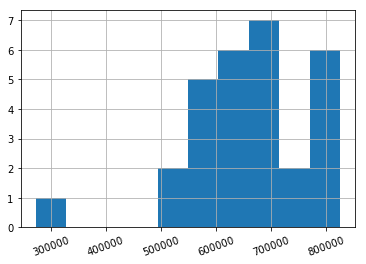

In [53]:
yearly_incidence.hist(xrot=20)